In [166]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt

# Example: Coin Flip
### I flip a coin 13 times.
### I want to find the prob distribution of the fairness of the coin.
### Specifically what is p, the probability of getting heads

In [167]:
# Heads = 1; Tails=0
flips = np.array([1,0,0,0,1,0,1,0,1,0,0,0,0])
n_heads = sum(flips)
n_flips = len(flips)

# I'll be using beta(1,1) basically a Unif(0,1) distribution for the prior
# And a Binomial pdf formula ~Bin(4, 13, p) for the Likelihood. We are trying to estimate p.
alpha_prior = 1
beta_prior = 1

### Posterior Probability Function: Prior * Likelihood 
(we don't need the denominator from Bayes because they'll cancel out when we make a posterior ratio, anyway)

In [168]:
def posterior(proposed_p, n_heads=n_heads, n_flips=n_flips, 
              alpha_prior=alpha_prior, beta_prior=beta_prior):
    likelihood = ss.binom.pmf(n_heads, n_flips, proposed_p) 
    prior = ss.beta.pdf(proposed_p, alpha_prior, beta_prior)
    return prior*likelihood

In [169]:
#Set the Seed and Guess a proposal_0

np.random.seed(42)
samples = []
current_p = n_heads/n_flips
print(current_p)

0.3076923076923077


# Metropolis Algo
### Acceptance Criterion: General RV Unif(0,1)
### If U~Unif(0,1) < acceptance probability (posterior_new/posterior_old), accept the step
### Else generate a new step using the PREVIOUS proposal

In [170]:
samples = []
for i in range(10000):
    proposed_p = np.random.normal(current_p, 0.1)
    proposed_p = min(1, max(proposed_p, 0))

    accept_prob = posterior(proposed_p)/posterior(current_p)

    if np.random.rand() < accept_prob:
        current_p = proposed_p
    
    samples.append(current_p)

Text(0, 0.5, 'Probability of Getting Heads Given the Data')

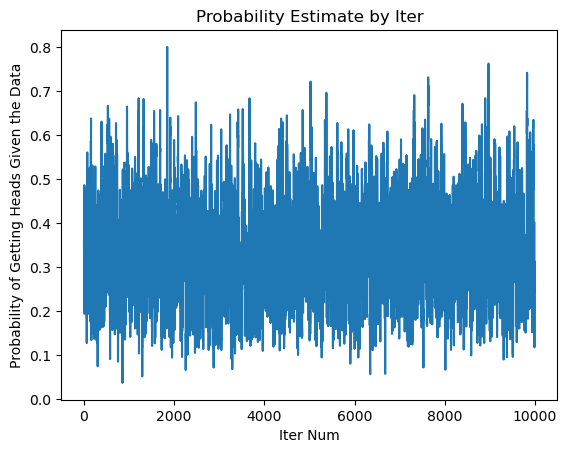

In [171]:

num_samples = len(samples)
samples2 = samples[100::100]
num_samples2 = len(samples2)

# fig,ax = plt.subplot()
plt.plot(list(range(num_samples)), samples)
plt.title("Probability Estimate by Iter")
plt.xlabel("Iter Num")
plt.ylabel("Probability of Getting Heads Given the Data")


Text(0.5, 0.98, 'Hist of Ps for Metropolis')

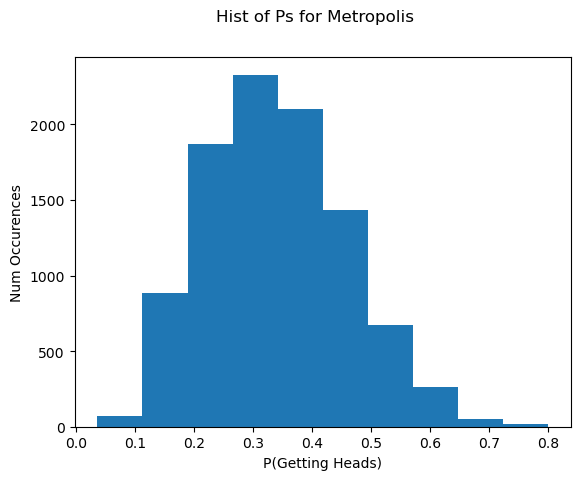

In [172]:
plt.hist(samples[300:])
plt.xlabel("P(Getting Heads)")
plt.ylabel("Num Occurences")
plt.suptitle("Hist of Ps for Metropolis")

# Metropolis - Hastings algorithm
## --> introduces a bias to create an assymmetrical distribution
## --> TBH I'm not sure why you would do this.

In [173]:
samples= []

for i in range(100000):
    # Propose a new p with a simple asymmetric mechanism
    if np.random.rand() < 0.7:  # 70% chance to move right
        proposed_p = current_p + np.random.normal(0.02, 0.05)  # Bias towards increasing p
        proposal_ratio = 0.7 / 0.3  # Forward probability / Reverse probability
    else:  # 30% chance to move left
        proposed_p = current_p - np.random.normal(0.02, 0.05)  # Bias towards decreasing p
        proposal_ratio = 0.3 / 0.7  # Adjusted for the reverse move

    proposed_p = min(max(proposed_p, 0), 1)  # Keep within bounds

    # Calculate the acceptance probability including the proposal ratio
    accept_prob = posterior(proposed_p)/posterior(current_p)

    # INCLUDE THE PROPOSAL RATIO IN THE ACCEPTANCE PROBABILITY!! IDK really why
    accept_prob = accept_prob * proposal_ratio
    
    if np.random.rand() < accept_prob:
        current_p = proposed_p
    
    samples.append(current_p)

Text(0, 0.5, 'Probability of Getting Heads Given the Data')

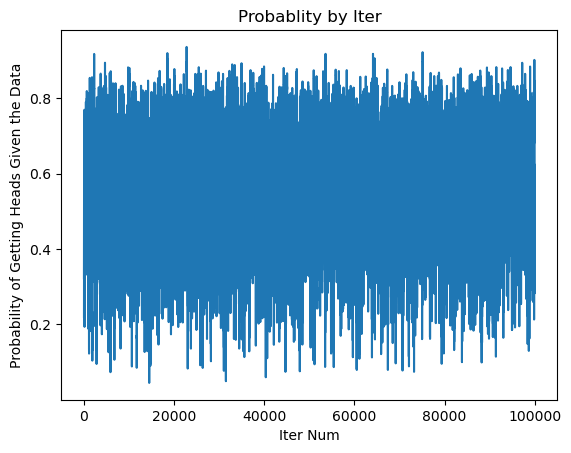

In [174]:
num_samples = len(samples)
samples2 = samples[100::100]
num_samples2 = len(samples2)

# fig,ax = plt.subplot()
plt.plot(list(range(num_samples)), samples)
plt.title("Probablity by Iter")
plt.xlabel("Iter Num")
plt.ylabel("Probability of Getting Heads Given the Data")


Text(0.5, 0.98, 'Hist of Ps for Metropolis-Hastings')

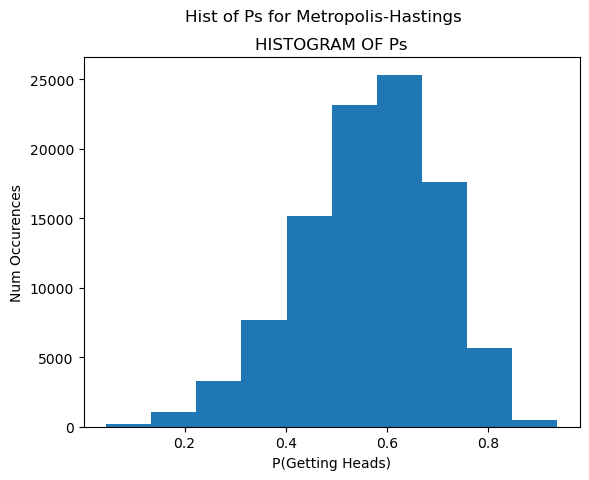

In [175]:
plt.hist(samples[300:])
plt.title("HISTOGRAM OF Ps")
plt.xlabel("P(Getting Heads)")
plt.ylabel("Num Occurences")
plt.suptitle("Hist of Ps for Metropolis-Hastings")

In [176]:
np.mean(samples)


0.5649217407726378